
<h2 style="text-align:center;" class="centrado"> Prácticas FAA: Salvador Martin Barcía y Patricia Matos Meza </h2>
<h3 style="text-align:center;" class="centrado"> Práctica 1: Particiones, Scikit-learn, Análisis ROC </h3>


<p style="font-size: medium;"> A continuación, distribuiremos este cuaderno en los cuatro apartados propuestos en la práctica. Al final de cada una de ellas habrá un resumen de lo medido para que así sea más fácil ver los resultados. </p>

<p style="font-size: medium;"> Ahora, importaremos todas las librerías necesarias para la ejecución. </p>

In [1]:
from Datos import Datos
from ValidacionCruzada import ValidacionCruzada
from ValidacionSimple import ValidacionSimple
from ClasificadorNaiveBayes import ClasificadorNaiveBayes
from sklearn import preprocessing, naive_bayes, model_selection
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

<h2>Particiones</h2>

<h3> Obtención de los datos </h3>

In [2]:
dataset = Datos('data/tic-tac-toe.data')
dataset2 = Datos('data/german.data')

<h3> Validación Simple </h3>
<h4> Tic-Tac-Toe </h4>

In [3]:
estrategia = ValidacionSimple(0.4, 1)
particion = estrategia.creaParticiones(dataset.datos)

print('20 primeros elementos de indices test:')
print(particion[0].indicesTest[:21], end='\n')
print('20 primeros elementos de indices train:')
print(particion[0].indicesTrain[:21], end='\n')

20 primeros elementos de indices test:
[673, 190, 420, 565, 253, 652, 0, 610, 725, 217, 15, 210, 499, 646, 179, 235, 733, 221, 816, 265, 305]
20 primeros elementos de indices train:
[199, 696, 626, 772, 65, 768, 852, 184, 115, 392, 759, 548, 196, 469, 172, 286, 43, 706, 358, 869, 872]


<h4> German </h4>

In [4]:
estrategia = ValidacionSimple(0.4, 1)
particion = estrategia.creaParticiones(dataset2.datos)

print('20 primeros elementos de indices test:')
print(particion[0].indicesTest[:21], end='\n')
print('20 primeros elementos de indices train:')
print(particion[0].indicesTrain[:21], end='\n')

20 primeros elementos de indices test:
[353, 798, 499, 238, 529, 153, 448, 479, 719, 845, 538, 173, 870, 430, 483, 641, 763, 896, 989, 589, 50]
20 primeros elementos de indices train:
[563, 232, 607, 804, 102, 631, 650, 986, 628, 57, 991, 450, 80, 619, 729, 122, 790, 6, 468, 384, 115]


<p style="font-size: medium;"> Validación simple divide los datos en una proporción determinada, en este caso, hemos escogido 40% de los datos para test y el resto para train. Uno de los incovenientes que tiene esta estrategia de particionado es justo el proceso de elegir las proporciones, debido a que se hacen de manera manual y estas podrían llegar a dejar la parte de train demasiado vacía o demasiado llena, al igual que pasaría con las proporciones para el testeo. </p>

<p style="font-size: medium;"> Otro inconveniente podría ser que hay que ejecutarlo más de una vez para poder tener un resultado óptimo y más acercado a la realidad. Para corregir eso, se ha añadido la variable numeroEjecuiones (en este caso a 1). Por otro lado, Validación simple tiene un coste computacional bajo y esto puede ser trivial a la hora de procesar DataSets extremadamente grandes. </p>

<h3> Validación Cruzada </h3>
<h4> Tic-Tac-Toe </h4>

In [5]:
estrategia = ValidacionCruzada(4)
particiones = estrategia.creaParticiones(dataset.datos)

for i, particion in enumerate(particiones):
    print('Particion', i+1)
    print('20 primeros elementos de indices test:')
    print(particion.indicesTest[:20], end='\n')
    print('20 primeros elementos de indices train de la particion:')
    print(particion.indicesTrain[:20], end='\n')
    print('\n')

Particion 1
20 primeros elementos de indices test:
[471, 438, 317, 809, 743, 936, 464, 236, 362, 169, 166, 707, 57, 505, 202, 685, 718, 794, 13, 734]
20 primeros elementos de indices train de la particion:
[612, 941, 870, 584, 255, 390, 51, 720, 821, 271, 573, 846, 836, 5, 492, 21, 60, 106, 949, 694]


Particion 2
20 primeros elementos de indices test:
[612, 941, 870, 584, 255, 390, 51, 720, 821, 271, 573, 846, 836, 5, 492, 21, 60, 106, 949, 694]
20 primeros elementos de indices train de la particion:
[471, 438, 317, 809, 743, 936, 464, 236, 362, 169, 166, 707, 57, 505, 202, 685, 718, 794, 13, 734]


Particion 3
20 primeros elementos de indices test:
[837, 600, 491, 332, 423, 399, 553, 839, 639, 753, 408, 692, 32, 40, 724, 759, 853, 769, 178, 482]
20 primeros elementos de indices train de la particion:
[471, 438, 317, 809, 743, 936, 464, 236, 362, 169, 166, 707, 57, 505, 202, 685, 718, 794, 13, 734]


Particion 4
20 primeros elementos de indices test:
[746, 604, 308, 25, 619, 158, 872,

<h4> German </h4>

In [6]:
estrategia = ValidacionCruzada(4)
particiones = estrategia.creaParticiones(dataset2.datos)

for i, particion in enumerate(particiones):
    print('Particion', i+1)
    print('20 primeros elementos de indices test:')
    print(particion.indicesTest[:20], end='\n')
    print('20 primeros elementos de indices train de la particion:')
    print(particion.indicesTrain[:20], end='\n')
    print('\n')

Particion 1
20 primeros elementos de indices test:
[55, 337, 639, 23, 25, 769, 357, 207, 480, 668, 196, 654, 834, 167, 32, 542, 137, 997, 867, 832]
20 primeros elementos de indices train de la particion:
[406, 686, 135, 564, 160, 864, 336, 838, 782, 307, 817, 161, 655, 691, 28, 201, 49, 584, 97, 534]


Particion 2
20 primeros elementos de indices test:
[406, 686, 135, 564, 160, 864, 336, 838, 782, 307, 817, 161, 655, 691, 28, 201, 49, 584, 97, 534]
20 primeros elementos de indices train de la particion:
[55, 337, 639, 23, 25, 769, 357, 207, 480, 668, 196, 654, 834, 167, 32, 542, 137, 997, 867, 832]


Particion 3
20 primeros elementos de indices test:
[863, 505, 732, 796, 970, 74, 268, 361, 202, 484, 0, 103, 375, 728, 6, 289, 177, 724, 767, 591]
20 primeros elementos de indices train de la particion:
[55, 337, 639, 23, 25, 769, 357, 207, 480, 668, 196, 654, 834, 167, 32, 542, 137, 997, 867, 832]


Particion 4
20 primeros elementos de indices test:
[706, 787, 1, 156, 496, 72, 702, 844, 6

<p style="font-size: medium;"> Validación cruzada crea N particiones aleatorias, cada una con sus indices para train y para test. Corrige el problema de Validación simple mencionado anteriormente, puesto que las particiones se crean aleatoriamente y más de una por ejecución. Además, la partición de test cambia en cada ejecución, y al acabar todas las ejecuciones todos los datos han estado exactamente una vez en el conjunto de test.</p>

<p style="font-size: medium;">
Un problema a destacar podría ser que su coste computacional es más elevado en comparación con Validación simple.</p>

<h2> Naive-Bayes </h2>
<h3> Validación Simple </h3>
<p style="font-size: medium">Ejecutaremos a continuación la estrategia de Validación Simple con las funciones programas en esta práctica. </p>

<h4> Tic-tac-toe </h4>
<p style="font-size: medium">A continuación, lo haremos sin la corrección de la place.</p>

In [7]:
estrategia = ValidacionSimple(0.4, 1)
clasificador = ClasificadorNaiveBayes(False)
error_vs_sin_laplace_t_faa = clasificador.validacion(estrategia, dataset, clasificador)
print(error_vs_sin_laplace_t_faa[0])

0.3083623693379791


<p style="font-size: medium">Ahora, calcularemos el error con la corrección de Laplace</p>

In [8]:
estrategia = ValidacionSimple(0.4, 1)
clasificador = ClasificadorNaiveBayes(True)
error_vs_con_laplace_t_faa = clasificador.validacion(estrategia, dataset, clasificador)
print(error_vs_con_laplace_t_faa[0])

0.29094076655052264


<h4> German </h4>
<p style="font-size: medium">A continuación, lo haremos sin la corrección de la place.</p>

In [9]:
estrategia = ValidacionSimple(0.4, 1)
clasificador = ClasificadorNaiveBayes(False)
error_vs_sin_laplace_g_faa = clasificador.validacion(estrategia, dataset2, clasificador)
print(error_vs_sin_laplace_g_faa[0])

0.2854757929883139


<p style="font-size: medium">Ahora, calcularemos el error con la corrección de Laplace</p>

In [10]:
estrategia = ValidacionSimple(0.4, 1)
clasificador = ClasificadorNaiveBayes(True)
error_vs_con_laplace_g_faa = clasificador.validacion(estrategia, dataset2, clasificador)
print(error_vs_con_laplace_g_faa[0])

0.2654424040066778


<h4> Resumen de lo medido </h4>

In [11]:
datos = [[error_vs_con_laplace_t_faa[0], error_vs_con_laplace_g_faa[0]], [error_vs_sin_laplace_t_faa[0], error_vs_sin_laplace_g_faa[0]]]
resumen = pd.DataFrame(datos, index=['Con Laplace', 'Sin Laplace'],columns=['Tic-Tac-Toe', 'German'])
print(resumen)

             Tic-Tac-Toe    German
Con Laplace     0.290941  0.265442
Sin Laplace     0.308362  0.285476


<h3> Validación Cruzada </h3>
<p style="font-size: medium">Ejecutaremos a continuación la estrategia de Validación Cruzada con las funciones programas en esta práctica. </p>

<h4> Tic-tac-toe </h4>
<p style="font-size: medium">A continuación, lo haremos sin la corrección de la place.</p>

In [12]:
estrategia = ValidacionCruzada(4)
clasificador = ClasificadorNaiveBayes(False)
error_vc_sin_laplace_t_faa = clasificador.validacion(estrategia, dataset, clasificador)

for i, error in enumerate(error_vc_sin_laplace_t_faa):
    print('Particion', i+1, ':', error)

Particion 1 : 0.3389121338912134
Particion 2 : 0.26359832635983266
Particion 3 : 0.26359832635983266
Particion 4 : 0.3070539419087137


<p style="font-size: medium">A continuación, lo haremos con la corrección de la place.</p>

In [13]:
estrategia = ValidacionCruzada(4)
clasificador = ClasificadorNaiveBayes(True)
error_vc_con_laplace_t_faa = clasificador.validacion(estrategia, dataset, clasificador)

for i, error in enumerate(error_vc_con_laplace_t_faa):
    print('Particion', i+1, ':', error)

Particion 1 : 0.30962343096234307
Particion 2 : 0.29707112970711297
Particion 3 : 0.29707112970711297
Particion 4 : 0.2863070539419087


<h4> German </h4>
<p style="font-size: medium">A continuación, lo haremos sin la corrección de la place.</p>

In [14]:
estrategia = ValidacionCruzada(4)
clasificador = ClasificadorNaiveBayes(False)
error_vc_sin_laplace_g_faa = clasificador.validacion(estrategia, dataset2, clasificador)

for i, error in enumerate(error_vc_sin_laplace_g_faa):
    print('Particion', i+1, ':', error)

Particion 1 : 0.268
Particion 2 : 0.204
Particion 3 : 0.232
Particion 4 : 0.272


<p style="font-size: medium">A continuación, lo haremos con la corrección de la place.</p>

In [15]:
estrategia = ValidacionCruzada(4)
clasificador = ClasificadorNaiveBayes(True)
error_vc_con_laplace_g_faa = clasificador.validacion(estrategia, dataset2, clasificador)

for i, error in enumerate(error_vc_con_laplace_g_faa):
    print('Particion', i+1, ':', error)

Particion 1 : 0.244
Particion 2 : 0.272
Particion 3 : 0.256
Particion 4 : 0.228


<h4> Resumen de lo medido </h4>

<p style="font-size: medium"><b>Con corrección de Laplace</b></p>

In [16]:
std_t = np.std(error_vc_con_laplace_t_faa)
std_g = np.std(error_vc_con_laplace_g_faa)
fila1 = []
fila2 = []
fila1.extend(error_vc_con_laplace_t_faa)
fila1.append(std_t)
fila2.extend(error_vc_con_laplace_g_faa)
fila2.append(std_g)
datos = [fila1, fila2]
resumen = pd.DataFrame(datos, columns=['Particion 1', 'Particion 2', 'Particion 3',' Particion 4', 'Desviación'],index=['Tic-Tac-Toe', 'German'])
print(resumen)

             Particion 1  Particion 2  Particion 3   Particion 4  Desviación
Tic-Tac-Toe     0.309623     0.297071     0.297071      0.286307    0.008256
German          0.244000     0.272000     0.256000      0.228000    0.016125


<p style="font-size: medium"><b>Sin corrección de Laplace</b></p>

In [17]:
std_t = np.std(error_vc_sin_laplace_t_faa)
std_g = np.std(error_vc_sin_laplace_g_faa)
fila1 = []
fila2 = []
fila1.extend(error_vc_sin_laplace_t_faa)
fila1.append(std_t)
fila2.extend(error_vc_sin_laplace_g_faa)
fila2.append(std_g)
datos = [fila1, fila2]
resumen = pd.DataFrame(datos, columns=['Particion 1', 'Particion 2', 'Particion 3',' Particion 4', 'Desviación'],index=['Tic-Tac-Toe', 'German'])
print(resumen)

             Particion 1  Particion 2  Particion 3   Particion 4  Desviación
Tic-Tac-Toe     0.338912     0.263598     0.263598      0.307054    0.031757
German          0.268000     0.204000     0.232000      0.272000    0.027857


<h2> Scikit-learn </h2>

<h3> Obtención de los datos </h3>

In [18]:
dataset = pd.read_csv('data/tic-tac-toe.data')
dataset2 = pd.read_csv('data/german.data')

<p style="font-size: medium">Preparamos los datos.</p>

In [19]:
encodedDataset = preprocessing.OneHotEncoder(sparse=False)
x = dataset.iloc[:,:-1]
x2 = dataset2.iloc[:,:-1]

encodedDataset.fit(x)
x_tictac = encodedDataset.transform(x) #Cogemos todos los datos menos la columna de Class
y_tictac = dataset.iloc[:,-1]

encodedDataset.fit(x2)
x_german = encodedDataset.transform(x2) #Cogemos todos los datos menos la columna de Class
y_german = dataset2.iloc[:,-1]

<h3> Validación Simple </h3>
<p style="font-size: medium">Ejecutaremos a continuación la estrategia de Validación Simple con las funciones proporcionadas en scikit-learn. </p>

<h4> Tic-tac-toe </h4>
<p style="font-size: medium">A continuación, lo haremos sin la corrección de Laplace.</p>

In [20]:
x_train, x_test, y_train,y_test = model_selection.train_test_split(x_tictac, y_tictac, test_size = 0.4, shuffle=True)

# Alpha corresponde a la corrección de LaPlace
clasificador = naive_bayes.MultinomialNB(alpha=0.0000000001)
clasificador.fit(x_train, y_train)
predicciones = clasificador.predict(x_test)
error_vs_sin_laplace_t = 1 - accuracy_score(y_test, predicciones)
print(error_vs_sin_laplace_t)

0.2578125


<p style="font-size: medium">Hemos puesto un valor de alpha de 0.0000000001, puesto que salta un warning que nos dice que el valor del mismo no puede ser tan bajo. El menor valor que acepta es el escogido.</p>

<p style="font-size: medium">Ahora, calcularemos el error con la corrección de Laplace</p>


In [21]:
x_train, x_test, y_train,y_test = model_selection.train_test_split(x_tictac, y_tictac, test_size = 0.4, shuffle=True)

# Alpha corresponde a la corrección de LaPlace
clasificador = naive_bayes.MultinomialNB(alpha=1)
clasificador.fit(x_train, y_train)
predicciones = clasificador.predict(x_test)
error_vs_con_laplace_t = 1 - accuracy_score(y_test, predicciones)
print(error_vs_con_laplace_t)

0.3125


<h4> German </h4>
<p style="font-size: medium">A continuación, lo haremos sin la corrección de la place para german_data.</p>

In [22]:
x_train, x_test, y_train,y_test = model_selection.train_test_split(x_german, y_german, test_size = 0.4, shuffle=True)

clasificador = naive_bayes.GaussianNB()
clasificador.fit(x_train, y_train)
predicciones = clasificador.predict(x_test)
error_vs_sin_laplace_g = 1 - accuracy_score(y_test, predicciones)
print(error_vs_sin_laplace_g)

0.6325000000000001


<p style="font-size: medium">Ahora, calcularemos el error con la corrección de Laplace. Como en GaussianNB jugamos con datos continuos, no podemos aplicar Laplace. Por ello, utilizamos MultinomialNB para aplicarlo.</p>

In [23]:
x_train, x_test, y_train,y_test = model_selection.train_test_split(x_german, y_german, test_size = 0.4, shuffle=True)

clasificador = naive_bayes.MultinomialNB(alpha=1)
clasificador.fit(x_train, y_train)
predicciones = clasificador.predict(x_test)
error_vs_con_laplace_g = 1 - accuracy_score(y_test, predicciones)
print(error_vs_con_laplace_g)

0.275


<h4> Resumen de lo medido con validación simple</h4>
<p style="font-size: medium">Vemos que sale una muy mala predicción para los datos de German sin laplace ya que tiene en cuenta datos continuos pero algunos son discretos.</p>

In [24]:
datos = [[error_vs_con_laplace_t, error_vs_con_laplace_g], [error_vs_sin_laplace_t, error_vs_sin_laplace_g]]
resumen = pd.DataFrame(datos, index=['Con Laplace', 'Sin Laplace'],columns=['Tic-Tac-Toe', 'German'])
print(resumen)

             Tic-Tac-Toe  German
Con Laplace     0.312500  0.2750
Sin Laplace     0.257812  0.6325


<h3> Validación Cruzada </h3>
<p style="font-size: medium">Ejecutaremos a continuación la estrategia de Validación Cruzada con las funciones proporcionadas en scikit-learn. </p>


<h4> Tic-tac-toe dataset </h4>
<p style="font-size: medium">A continuación, lo haremos sin la corrección de Laplace.</p>

In [25]:
nb = naive_bayes.MultinomialNB(alpha=0.0000000001)
cv = model_selection.ShuffleSplit(n_splits=4)
list_error_t = 1 - model_selection.cross_val_score(nb, x_tictac, y_tictac, cv=cv)
print(list_error_t)

[0.30208333 0.36458333 0.29166667 0.29166667]


<p style="font-size: medium">Ahora, calcularemos el error con la corrección de Laplace</p>

In [26]:
nb = naive_bayes.MultinomialNB(alpha=1)
cv = model_selection.ShuffleSplit(n_splits=4)
list_error_t_l = 1 - model_selection.cross_val_score(nb, x_tictac, y_tictac, cv=cv)
print(list_error_t_l)

[0.34375    0.21875    0.26041667 0.38541667]


<p style="font-size: medium">Si ponemos más particiones en la validación cruzada nos sale un mejor valor de error.</p>

<h4> German </h4>
<p style="font-size: medium">A continuación, lo haremos sin la corrección de la place para german_data. Usamos MultinominalNB porque da un valor mejor ya que tiene atributos continuos y discretos.</p>

In [27]:
nb = naive_bayes.MultinomialNB(alpha=0.0000000001)
cv = model_selection.ShuffleSplit(n_splits=4)
list_error_g = 1 - model_selection.cross_val_score(nb, x_german, y_german, cv=cv)
print(list_error_g)

[0.32 0.32 0.35 0.28]


<p style="font-size: medium">Ahora, calcularemos el error con la corrección de Laplace. Como en GaussianNB jugamos con datos continuos, no podemos aplicar Laplace. Por ello, utilizamos MultinomialNB para aplicarlo.</p>

In [28]:
nb = naive_bayes.MultinomialNB(alpha=1)
cv = model_selection.ShuffleSplit(n_splits=4)
list_error_g_l = 1 - model_selection.cross_val_score(nb, x_german, y_german, cv=cv)
print(list_error_g_l)

[0.28 0.35 0.23 0.25]


<h4> Resumen de lo medido con validación cruzada</h4>
<p style="font-size: medium">Vemos que los datos medidos por scikit-learn son muy parecidos a los nuestros</p>

<p style="font-size: medium"><b>Con corrección de Laplace</b></p>

In [29]:
datos = [list_error_t_l, list_error_g]
resumen = pd.DataFrame(datos, columns=['Particion 1', 'Particion 2', 'Particion 3',' Particion 4'],index=['Tic-Tac-Toe', 'German'])
print(resumen)

             Particion 1  Particion 2  Particion 3   Particion 4
Tic-Tac-Toe      0.34375      0.21875     0.260417      0.385417
German           0.32000      0.32000     0.350000      0.280000


<p style="font-size: medium"><b>Sin corrección de Laplace</b></p>

In [30]:
datos = [list_error_t, error_vc_sin_laplace_g_faa]
resumen = pd.DataFrame(datos, columns=['Particion 1', 'Particion 2', 'Particion 3',' Particion 4'],index=['Tic-Tac-Toe', 'German'])
print(resumen)

             Particion 1  Particion 2  Particion 3   Particion 4
Tic-Tac-Toe     0.302083     0.364583     0.291667      0.291667
German          0.268000     0.204000     0.232000      0.272000


<h2> Análisis ROC </h2>

<h3> Obtención de los datos </h3>

In [31]:
dataset = Datos('data/tic-tac-toe.data')
dataset2 = Datos('data/german.data')

<h4> Tic-tac-toe dataset </h4>
<p style="font-size: medium">A continuación, calcularemos la matriz de confusión.</p>

In [32]:
clasificador = ClasificadorNaiveBayes(False)
clasificador.entrenamiento(dataset.datos, dataset.nominalAtributos, dataset.diccionario)
predicciones = clasificador.clasifica(dataset.datos, dataset.nominalAtributos, dataset.diccionario)
clases = list(dataset.datos.iloc[:, -1])
matrix_t = confusion_matrix(y_true=clases, y_pred=predicciones)
print(matrix_t)

[[148 184]
 [105 521]]


<p style="font-size: medium">A continuación, calcularemos las tasas de FPR y TPR, que irán en el eje de las abscisas y eje de las ordenadas respectivamente. </p>

In [33]:
FPR_t = matrix_t[0][1] / (matrix_t[0][1] + matrix_t[1][1])
TPR_t = matrix_t[0][0] /(matrix_t[0][0] + matrix_t[1][0])

<h4> German dataset </h4>
<p style="font-size: medium">A continuación, calcularemos la matriz de confusión.</p>

In [34]:
clasificador = ClasificadorNaiveBayes(False)
clasificador.entrenamiento(dataset2.datos, dataset2.nominalAtributos, dataset2.diccionario)
predicciones = clasificador.clasifica(dataset2.datos, dataset2.nominalAtributos, dataset2.diccionario)
clases = list(dataset2.datos.iloc[:, -1])
matrix_g = confusion_matrix(y_true=clases, y_pred=predicciones)
print(matrix_g)

[[609  91]
 [137 163]]


<h4> Dibujamos el espacio ROC</h4>

<p style="font-size: medium">A continuación, calcularemos las tasas de FPR y TPR, que irán en el eje de las abscisas y eje de las ordenadas respectivamente. </p>

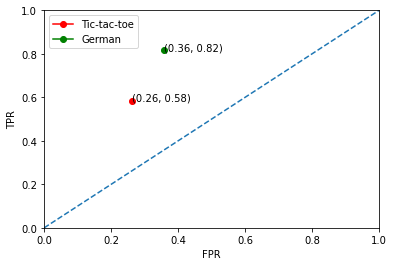

In [35]:
FPR_g = matrix_g[0][1] / (matrix_g[0][1] + matrix_g[1][1])
TPR_g = matrix_g[0][0] /(matrix_g[0][0] + matrix_g[1][0])

#Plotteamos las gráficas

plt.plot(FPR_t, TPR_t, color='red', marker='o', label='Tic-tac-toe')
plt.plot(FPR_g, TPR_g, color='green', marker='o', label='German')
plt.plot( [0,1],[0,1], ls='--') #Linea diagonal

FPR = [FPR_g, FPR_t]
TPR = [TPR_g, TPR_t]
for x, y in zip(FPR, TPR):
    plt.text(x, y, '({}, {})'.format(round(x,2), round(y,2)))

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

<p style="font-size: medium"> A mayor distancia de la recta, por encima de esta, mejor es la predicción. Por lo que, podemos concluir que la predicción hecha en los datos de German es mejor a la de los datos de Tic-tac-toe.</p>

<p style="font-size: medium"> Nos ha parecido interesante calcular las distancias euclídeas exactas a la diagonal para corroborar nuestra conclusión. Ahora, los resultados.</p>

In [36]:
# Calculemos las distancias euclideas

p1 = np.array([0,0])
p2 = np.array([1,1])
p_g = np.array([FPR_g,TPR_g])
p_t = np.array([FPR_t,TPR_t])
p_d = np.array([0.5,0.5])

d_g = np.cross(p2 - p1,p_g - p1) / np.linalg.norm(p2 - p1)
d_t = np.cross(p2 - p1,p_t - p1) / np.linalg.norm(p2 - p1)
d_d = np.cross(p2 - p1,p_d - p1) / np.linalg.norm(p2 - p1)
print(d_g, d_t, d_d)

0.32391583778573557 0.22909363760383597 0.0


<p style="font-size: medium"> Como hemos concluido anteriormente, observamos que la distancia d_g correspondiente a los datos de german, es mayor a la distancia d_t correspondiente a los datos de tic-tac-toe, y ambas están por encima de la diagonal. Hemos calculado la distancia de un punto dentro de la recta para asegurarnos de las distancias en sí estuviesen bien calculadas.</p>